In [68]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords
import re
import spacy
nlp=spacy.load('en_core_web_sm')

In [2]:
df = pd.read_csv("../Dataset/train.csv")
df_test = pd.read_csv("../Dataset/test.csv")
comments_test = df_test["CONTENT"]
print(comments_test)

0                                            so beutiful
1      everyone please come check our newest song in ...
2      katy perry will u sit on my face please. it wo...
3      Check Out The New Hot Video By Dante B Called ...
4      I really love this video.. http://www.bubblews...
                             ...                        
582                 please subscribe to my page. thanks.
583                                     I love this song
584                                   Eminem THE BEST !﻿
585                                     beautiful song!﻿
586             why I dont see any comments but mine?:/﻿
Name: CONTENT, Length: 587, dtype: object


In [ ]:
print(df)

In [ ]:
print(df_test)
df_test.head()

In [ ]:
df.isnull().sum()

We can see that the content and class column has 0 missing values. Only some dates missing which is pretty irrelevant. Let's remove irrelevant columns. 

In [113]:
df = df.drop(["DATE", "VIDEO_NAME"], axis = 1)

In [ ]:
df.head(10)

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/svishwa4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stop_words = stopwords.words('english')
print(f" Stop words used: \n", stop_words)

 Stop words used: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sa

In [5]:
# Clean the dataset by removing stop words
df_clean = df
print(f" data frame before cleaning: \n", df.head(10))

stop_words = stopwords.words('english')
print(f" Stop words used: \n", stop_words)

def clean_text(text):
  text=text.lower()
  text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
  text = re.sub(r'\@\w+|\#','', text)
  text = re.sub(r'[^\x00-\x7F]+','', text)
  text=re.sub(r'[^a-zA-Z0-9\s]','',text)
  text=re.sub(r'\s+https\S+',' ',text)
  text=re.sub(r'\s+www\S+',' ',text)
  text=re.sub(r'\s+http\S+',' ',text)
  text=re.sub(r'\s+',' ',text)
  text=re.sub(r'\d+','',text)
  text=text.strip()
  words = nlp(text)
  words = [word.lemma_ for word in words]
  words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 2]
  return ' '.join(words)


df_clean['CONTENT']=df_clean['CONTENT'].apply(clean_text)
print(f" data frame after cleaning: \n", df_clean.head(10))

# df = df_clean

NameError: name 'df' is not defined

Let's create our training and testing data. 20% of data for testing and 80% for training

In [4]:
X = df["CONTENT"]
Y = df["CLASS"]
print(X)

0       I dont even watch it anymore i just come here ...
1                                             i hate rap﻿
2             I loved, she is amazing.. OMG your eyes*_*﻿
3                                            song is bad﻿
4                                            tension⤴︎⤴︎﻿
                              ...                        
1364                                          Great song﻿
1365      The population of world is more than 7 billion﻿
1366    At least she didn't get rid of her completely ...
1367                                    i love this song﻿
1368                        Who is watching in 2015 like﻿
Name: CONTENT, Length: 1369, dtype: object


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)


In [6]:
# Change the min_df from 1 to 5, i.e, if a word appears in less than 5 sentences, drop it. 
feature_extraction = TfidfVectorizer(min_df = 2, stop_words = 'english', lowercase = True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#let's make sure the labels for Y are in int form e.g 0, 1 and not any other like "0", "1"
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [7]:
test_data_X = feature_extraction.transform(comments_test)

In [8]:
X_train_features.shape

(1095, 884)

In [119]:
print(X_train_features)
X_train_features.shape

  (np.int32(0), np.int32(456))	1.0
  (np.int32(1), np.int32(210))	0.5182967949860864
  (np.int32(1), np.int32(505))	0.32354491180683187
  (np.int32(1), np.int32(537))	0.3778695757719579
  (np.int32(1), np.int32(94))	0.5182967949860864
  (np.int32(1), np.int32(462))	0.46397213102096047
  (np.int32(2), np.int32(820))	0.7205564366778823
  (np.int32(2), np.int32(861))	0.6933962947421001
  (np.int32(3), np.int32(222))	0.6662694226130323
  (np.int32(3), np.int32(144))	0.5715708983600497
  (np.int32(3), np.int32(697))	0.2866538229602437
  (np.int32(3), np.int32(103))	0.38369434504701716
  (np.int32(4), np.int32(434))	0.4264964264172703
  (np.int32(4), np.int32(145))	0.5735059056748782
  (np.int32(4), np.int32(833))	0.6994224577530634
  (np.int32(5), np.int32(434))	0.5967417939218324
  (np.int32(5), np.int32(145))	0.8024333189661016
  (np.int32(6), np.int32(505))	0.13829275095766727
  (np.int32(6), np.int32(537))	0.16151273356420412
  (np.int32(6), np.int32(322))	0.1291831472245031
  (np.int32

(1095, 884)

We created the TF-IDF matrix where each sentence represented as a vector with weighing given to certain words. 
Notice how there are 2821 columns meaning there are 2821 features (DAMN). 

In [9]:
model = LogisticRegression() #create an instance of a logistic regression model I can train

In [23]:
# Experiment with SVC model

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix 

svmModel = svm.SVC()
svmModel.fit(X_train_features, Y_train)
prediction_on_training_data = svmModel.predict(X_train_features) 

#accuracy score = # of correct predictions / Total # of predictions 
#CALCULATING 1 - TRAINING ERROR RATE 
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print(f"Training accuracy: {accuracy_on_training_data} ")

# Test accuracy
prediction_on_test_data = svmModel.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print(f"Test accuracy: {accuracy_on_test_data}")

print(f"Classification report with original SVC model:\n {classification_report(Y_test, prediction_on_test_data)} ")

################################################
### Use grid search CV to find the best SVC model
################################################
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 5, 8, 10, 100],  
              'gamma': [1, 0.5, 0.3, 0.2, 0.1, 0.09, 0.01], 
              'degree':[0, 1, 2, 3],
              'kernel': ['rbf', 'linear']}

gridModel = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
gridModel.fit(X_train_features, Y_train) 

# print best parameter after tuning 
print(f"Parameters from grid search: {gridModel.best_params_}" ) 
  
# print how our model looks after hyper-parameter tuning 
print(f"Estimator from grid search: {gridModel.best_estimator_}") 

prediction_on_training_data = gridModel.predict(X_train_features) 

#accuracy score = # of correct predictions / Total # of predictions 
#CALCULATING 1 - TRAINING ERROR RATE 
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print(f"Training accuracy from grid Model: {accuracy_on_training_data} ")

# Test accuracy
prediction_on_test_data = gridModel.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print(f"Test accuracy from grid Model: {accuracy_on_test_data}")

print(f"Classification report with grid model:\n {classification_report(Y_test, prediction_on_test_data)} ")

Training accuracy: 0.993607305936073 
Test accuracy: 0.9525547445255474
Classification report with original SVC model:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       149
           1       0.96      0.94      0.95       125

    accuracy                           0.95       274
   macro avg       0.95      0.95      0.95       274
weighted avg       0.95      0.95      0.95       274
 
Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Parameters from grid search: {'C': 8, 'degree': 0, 'gamma': 0.5, 'kernel': 'rbf'}
Estimator from grid search: SVC(C=8, degree=0, gamma=0.5)
Training accuracy from grid Model: 0.9972602739726028 
Test accuracy from grid Model: 0.948905109489051
Classification report with grid model:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       149
           1       0.95      0.94      0.94       125

    accuracy                           0

AttributeError: 'GridSearchCV' object has no attribute 'summary'

In [58]:
# Display the top 20 influential coefficients for Logistic Regression model

LRModel = LogisticRegression(C=4.281332398719396, solver='saga')
LRModel.fit(X_train_features, Y_train)

coefficients = LRModel.coef_[0]
intercept = LRModel.intercept_[0]

# Interpret the coefficients
odds_ratios = np.exp(coefficients)

# Feature names (for illustration purposes)
feature_names = [f'feature_{i}' for i in range(X_train_features.shape[1])]

# Create a DataFrame for easy manipulation
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort the features by the absolute value of the coefficients
top_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head(20)

# Display the top 20 influential features
print(top_features[['Feature', 'Coefficient']])

# Sort features by absolute coefficient
sorted_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Filter features with absolute coefficient above 1.0
top_features_above_threshold = sorted_features[sorted_features['Absolute Coefficient'] > 2.0]

# Display the top features
print(top_features_above_threshold[['Feature', 'Coefficient', 'Absolute Coefficient']])

# print("Coefficients (log odds):", coefficients)
# print("Intercept (log odds):", intercept)
# print("Odds Ratios:", odds_ratios)

         Feature  Coefficient
125  feature_125     9.480583
732  feature_732     7.260215
140  feature_140     5.986864
122  feature_122     4.771125
735  feature_735     4.342297
522  feature_522     3.896317
359  feature_359     3.762943
360  feature_360     3.520873
670  feature_670     3.447836
769  feature_769     3.395278
865  feature_865     3.286485
733  feature_733     2.918363
267  feature_267     2.696019
145  feature_145     2.548814
831  feature_831     2.539147
612  feature_612     2.521616
92    feature_92    -2.431994
697  feature_697    -2.430886
816  feature_816    -2.401459
668  feature_668    -2.286893
         Feature  Coefficient  Absolute Coefficient
125  feature_125     9.480583              9.480583
732  feature_732     7.260215              7.260215
140  feature_140     5.986864              5.986864
122  feature_122     4.771125              4.771125
735  feature_735     4.342297              4.342297
522  feature_522     3.896317              3.896317
359  f

In [53]:
print(X_train_features.shape)
print(LRModel.coef_.shape)
print(X_train_features)
X_train_features[1,95]

(1095, 884)
(1, 884)
  (0, 456)	1.0
  (1, 94)	0.5182967949860864
  (1, 210)	0.5182967949860864
  (1, 462)	0.46397213102096047
  (1, 505)	0.32354491180683187
  (1, 537)	0.3778695757719579
  (2, 820)	0.7205564366778823
  (2, 861)	0.6933962947421001
  (3, 103)	0.38369434504701716
  (3, 144)	0.5715708983600497
  (3, 222)	0.6662694226130323
  (3, 697)	0.2866538229602437
  (4, 145)	0.5735059056748782
  (4, 434)	0.4264964264172703
  (4, 833)	0.6994224577530634
  (5, 145)	0.8024333189661016
  (5, 434)	0.5967417939218324
  (6, 1)	0.15756707798629785
  (6, 110)	0.1488736206451061
  (6, 125)	0.23411440886812107
  (6, 140)	0.31788949385389886
  (6, 155)	0.2311726813838146
  (6, 190)	0.16762038789258557
  (6, 235)	0.1711498970785194
  (6, 322)	0.1291831472245031
  :	:
  (1088, 732)	0.3895782748576083
  (1088, 754)	0.7048507133391682
  (1089, 87)	0.35423850740825885
  (1089, 89)	0.5496857074038787
  (1089, 220)	0.400753983188702
  (1089, 283)	0.492071051804957
  (1089, 460)	0.41185316300718056
  (10

0.0

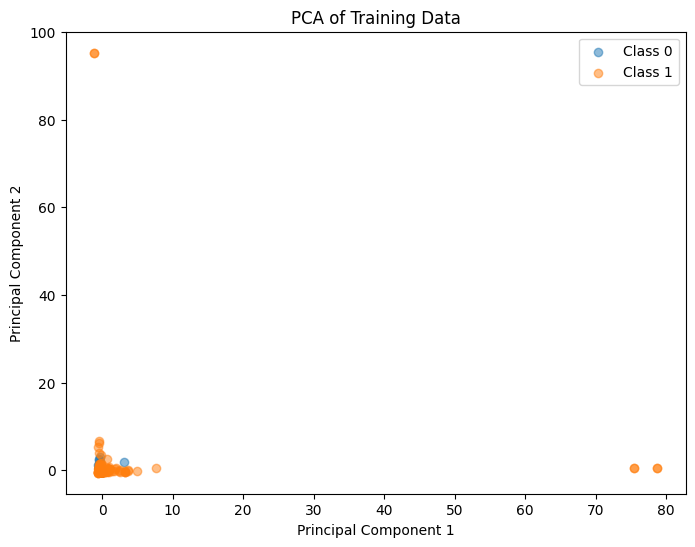

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features without centering
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_train_features)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled.toarray())  # Convert to dense for PCA

# Assuming you have binary labels in Y_train
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[Y_train == 0, 0], X_pca[Y_train == 0, 1], alpha=0.5, label='Class 0')
plt.scatter(X_pca[Y_train == 1, 0], X_pca[Y_train == 1, 1], alpha=0.5, label='Class 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data')
plt.legend()
plt.show()


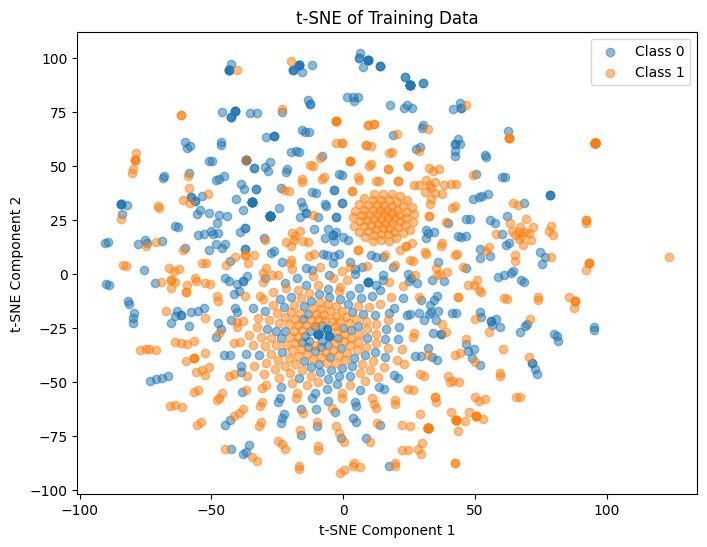

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Standardize the features without centering
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_train_features)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled.toarray())  # Convert to dense if necessary

# Plotting t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[Y_train == 0, 0], X_tsne[Y_train == 0, 1], alpha=0.5, label='Class 0')
plt.scatter(X_tsne[Y_train == 1, 0], X_tsne[Y_train == 1, 1], alpha=0.5, label='Class 1')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Training Data')
plt.legend()
plt.show()


/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


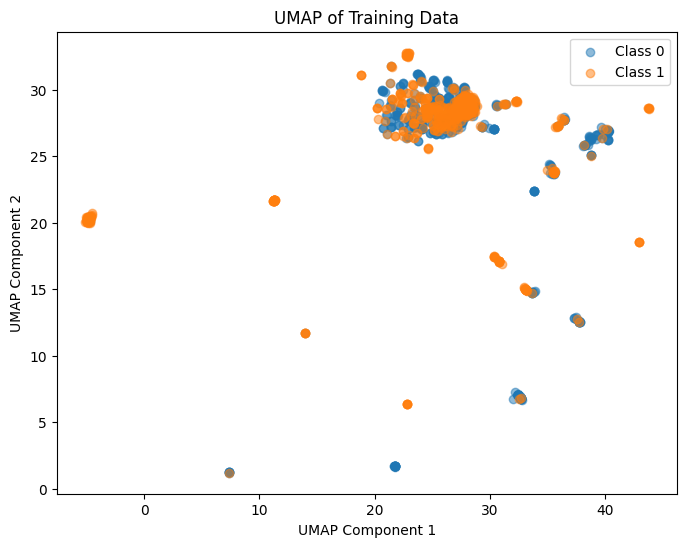

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Standardize the features without centering
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_train_features)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled.toarray())  # Convert to dense if necessary

# Plotting UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[Y_train == 0, 0], X_umap[Y_train == 0, 1], alpha=0.5, label='Class 0')
plt.scatter(X_umap[Y_train == 1, 0], X_umap[Y_train == 1, 1], alpha=0.5, label='Class 1')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of Training Data')
plt.legend()
plt.show()


In [67]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Assume X_train_features is a dense matrix for simplicity
X_dense = X_train_features.toarray() if hasattr(X_train_features, "toarray") else X_train_features

# Calculate Z-scores
z_scores = np.abs(zscore(X_dense))

# Set a threshold for defining outliers
threshold = 10

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
X_cleaned = np.delete(X_dense, outliers[0], axis=0)
Y_cleaned = np.delete(Y_train, outliers[0], axis=0)

print("Original data shape:", X_dense.shape)
print("Cleaned data shape:", X_cleaned.shape)


Original data shape: (1095, 884)
Cleaned data shape: (252, 884)


In [10]:
model.fit(X_train_features, Y_train) #training logistic regression model on training data using MLE

LogisticRegression()

In [11]:
#the next line takes the matrix of training data and spits out an array of predictions full of 
#0s and 1s, classifying each vector (representation of a sentence) as spam or non-spam
prediction_on_training_data = model.predict(X_train_features) 

#accuracy score = # of correct predictions / Total # of predictions 
#CALCULATING 1 - TRAINING ERROR RATE 
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print(accuracy_on_training_data)

0.965296803652968


In [12]:
test_data_prediction = model.predict(test_data_X) 
print(test_data_prediction)
test_data_prediction.shape
df_test["CLASS"] = test_data_prediction
df_test.head()


[0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 0 1 0 0 1 0 0 0 1 0 1 

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,1370,tyler sleetway,2013-10-05 00:57:25.078,so beutiful,Shakira - Waka Waka,0
1,1371,Young Hittaz,2014-01-19 04:21:11,everyone please come check our newest song in ...,PSY - GANGNAM STYLE(?????) M/V,1
2,1372,WeMuckAround,2014-08-16 20:59:28,katy perry will u sit on my face please. it wo...,Katy Perry - Roar,0
3,1373,DanteBTV,NaN,Check Out The New Hot Video By Dante B Called ...,Eminem - Love The Way You Lie ft. Rihanna,1
4,1374,Sheila Cenabre,2014-08-19 12:33:11,I really love this video.. http://www.bubblews...,Katy Perry - Roar,1


In [59]:
# Drop every column except for commentID and Class
df_test = df_test.drop(["AUTHOR", "DATE", "CONTENT", "VIDEO_NAME"], axis = 1)
df_test.head()

,COMMENT_ID,CLASS
0,1370,0
1,1371,1
2,1372,0
3,1373,1
4,1374,0


In [60]:
#Store df_test in a .csv file
df_test.to_csv("classified_result_model2.csv", index=False)

In [61]:
# print(X_train_features)
prediction_on_training_data

array([0, 1, 0, ..., 1, 0, 0])

In [62]:
print(accuracy_on_training_data)

0.9260273972602739


Our predictions were correct 97.5% of the time using the logistic regression model we fitted. 

In [13]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print(accuracy_on_test_data)

0.9598540145985401


Pretty good accuracy on test data as well. 

In [64]:
input_your_comment = [""]
input_data_features = feature_extraction.transform(input_your_comment)
prediction = model.predict(input_data_features)
print(prediction)


[0]


In [65]:
df2 = pd.read_csv("test.csv")

In [66]:
df2.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME
0,1370,tyler sleetway,2013-10-05 00:57:25.078,so beutiful,Shakira - Waka Waka
1,1371,Young Hittaz,2014-01-19 04:21:11,everyone please come check our newest song in ...,PSY - GANGNAM STYLE(?????) M/V
2,1372,WeMuckAround,2014-08-16 20:59:28,katy perry will u sit on my face please. it wo...,Katy Perry - Roar
3,1373,DanteBTV,NaN,Check Out The New Hot Video By Dante B Called ...,Eminem - Love The Way You Lie ft. Rihanna
4,1374,Sheila Cenabre,2014-08-19 12:33:11,I really love this video.. http://www.bubblews...,Katy Perry - Roar


In [67]:
X1 = df2["CONTENT"]
#No Y labels. How can I compare this to true labels? idk
transform_X1 = feature_extraction.transform(X1)
new_prediction = model.predict(transform_X1)

In [17]:
# Now that we have a model above that works, we will look at grid-search CV methods to search for the best model using hyperparameter tuning

# Consturct a parameter grid 
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]


In [18]:

# Load grid-search-cv frok sklearn and fit the model 
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model,param_grid = param_grid, cv = 3, verbose=False,n_jobs=-1)

best_clf = clf.fit(X_train_features, Y_train)
print(best_clf.best_estimator_)

/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/svishwa4/Library/P

LogisticRegression(C=4.281332398719396, solver='saga')


/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/svishwa4/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1194

In [19]:
print(best_clf.best_estimator_)
print(best_clf.best_estimator_.get_params())


LogisticRegression(C=4.281332398719396, solver='saga')
{'C': 4.281332398719396, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [20]:
# Checking the accuracy score on the best fit model
print(f'Accuracy after tuninig parameters - : {best_clf.score(X_train_features, Y_train):.3f}')
# accuracy_score(Y_train, prediction_on_training_data)

Accuracy after tuninig parameters - : 0.983


In [21]:
clf_prediction_on_training_data = clf.predict(X_train_features) 

#accuracy score = # of correct predictions / Total # of predictions 
#CALCULATING 1 - TRAINING ERROR RATE 
clf_accuracy_on_training_data = accuracy_score(Y_train, clf_prediction_on_training_data)
print(clf_accuracy_on_training_data)

0.982648401826484


In [22]:
clf_prediction_on_train_test_data = clf.predict(X_test_features)
clf_accuracy_on_test_data = accuracy_score(Y_test, clf_prediction_on_train_test_data)
print(clf_accuracy_on_test_data)

0.9635036496350365


In [74]:
# Run the clf_prediction on the test data set and store its values in a new csv file
clf_prediction_on_test_test_data = clf.predict(test_data_X)
print(clf_prediction_on_test_test_data)
df_test["CLASS"] = test_data_prediction
print(df_test.head())
#Store df_test in a .csv file
df_test.to_csv("classified_result_model3.csv", index=False)

[0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 1 0 0 